In [78]:
import json
import os
from timeit import default_timer

import numpy as np
from pyscf import gto, scf

from tn4qa.dmrg import FermionDMRG, QubitDMRG

np.random.seed(2)
cwd = os.getcwd()

def test_QubitDMRG(filename, max_bond, max_runs = 10):
    location = os.path.join(cwd, filename)
    with open(location) as f:
        ham_dict = json.load(f)
    dmrg = QubitDMRG(ham_dict, max_mps_bond=max_bond, method="two-site")
    energy, _ = dmrg.run(max_runs)
    return dmrg.all_energies


def test_timings(filename):
    start = default_timer()
    location = os.path.join(cwd, filename)
    with open(location) as f:
        ham = json.load(f)
    ham_dict = {k: float(v[0]) for k, v in ham.items()}
    dmrg = QubitDMRG(ham_dict, 4)
    energy, _ = dmrg.run(2)
    stop1 = default_timer()
    return energy, stop1 - start


In [93]:
def run_max_bond(max_bond, folder, max_runs = 10):
    outputs = {}
    outputs["knto"]= test_QubitDMRG(folder + "/knto.json", max_bond, max_runs)
    outputs["knto_xz"]= test_QubitDMRG(folder + "/knto_xz_swap.json", max_bond, max_runs)
    outputs["jkmn"] = test_QubitDMRG(folder + "/jkmn.json", max_bond, max_runs)
    outputs["jw"] = test_QubitDMRG(folder + "/jw.json", max_bond, max_runs)
    outputs["pe"]= test_QubitDMRG(folder + "/pe.json", max_bond, max_runs)
    outputs["bk"] = test_QubitDMRG(folder + "/bk.json", max_bond, max_runs)
    # outputs["jw_pe"] = test_QubitDMRG(folder + "/jw_10_pe_4.json", max_bond)
    # outputs["all_y"] = test_QubitDMRG(folder + "/all_y.json", max_bond)
    # outputs["jw_5nto"] = test_QubitDMRG(folder + "/jw_with_5knto.json", max_bond)
    # outputs["jw_3nto"] = test_QubitDMRG(folder + "/jw_with_3knto.json", max_bond)
    # outputs["pe_5nto"] = test_QubitDMRG(folder + "/pe_with_5knto.json", max_bond)
    # outputs["pe_3nto"] = test_QubitDMRG(folder + "/pe_with_3knto.json", max_bond)
    # outputs["original knto"] = test_QubitDMRG(folder + "/original knto.json", max_bond)
    return outputs

# Water Hamiltonian

In [99]:
vals = {}
for val in range(2, 7, 2):
    print("Running %d", val)
    vals[str(val)]= run_max_bond(val, "sto-3g/water")

Running %d 2
Running %d 4
Running %d 6


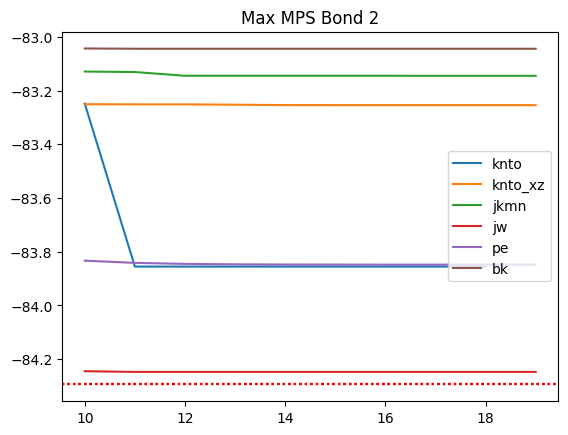

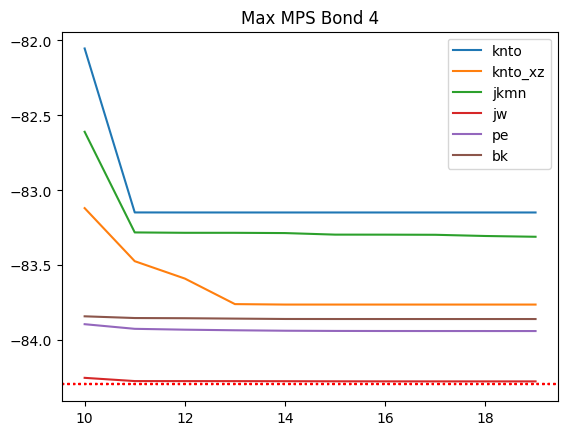

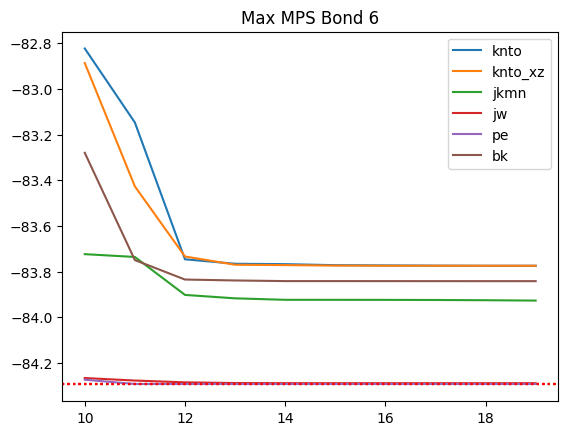

In [100]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:#['k-nto (7)', 'jw', 'pe', 'kb']:
        plt.plot(set[encoding], label=encoding.replace("flower","5nto"))
        plt.axhline(y=-84.2948, color='r', linestyle=':')
    plt.title(f"Max MPS Bond {max_bond}")
    plt.legend()
    plt.show()

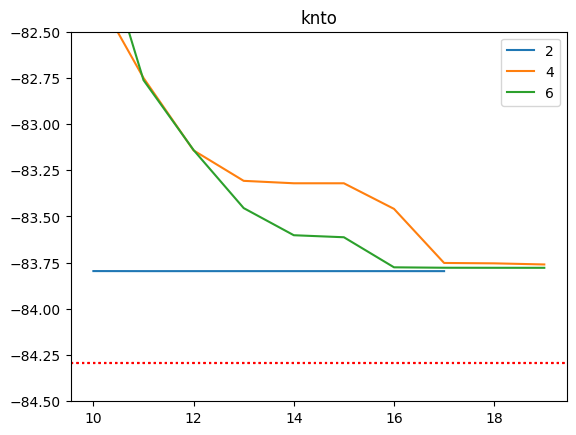

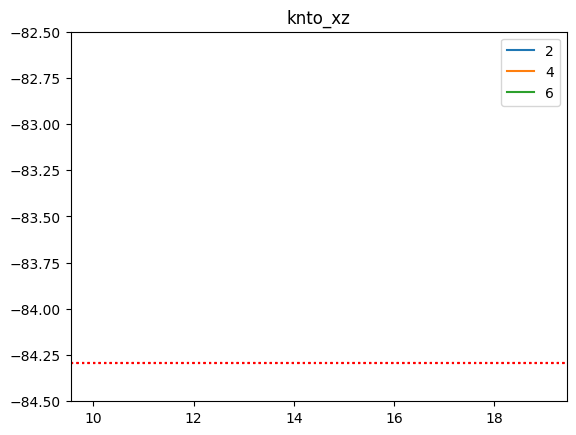

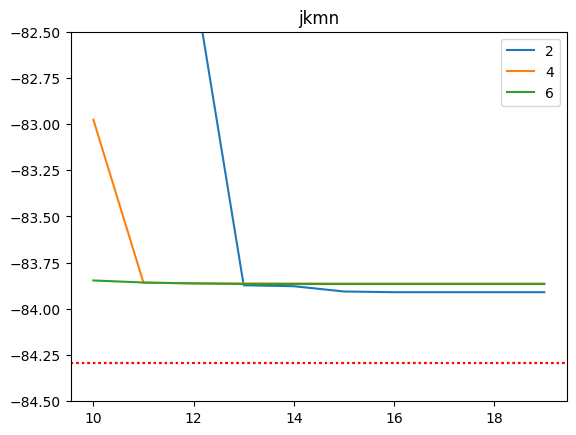

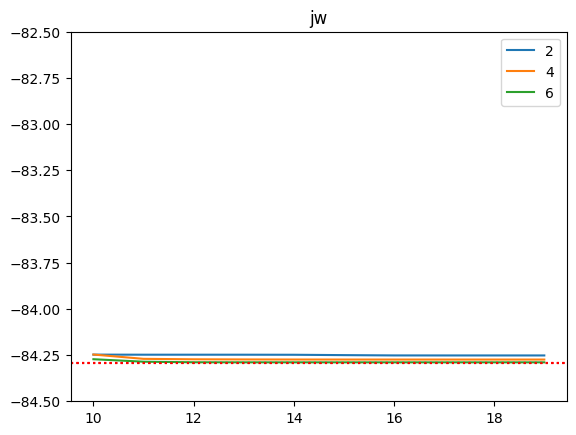

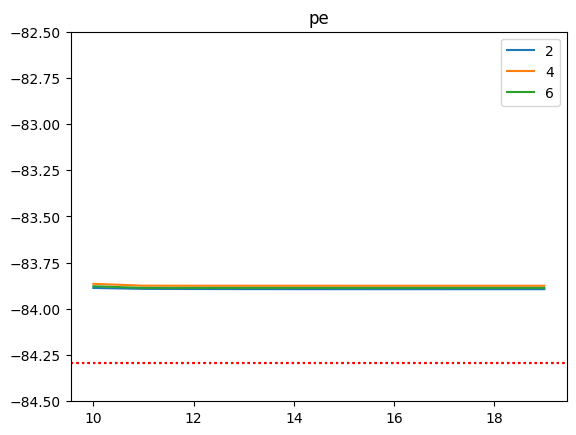

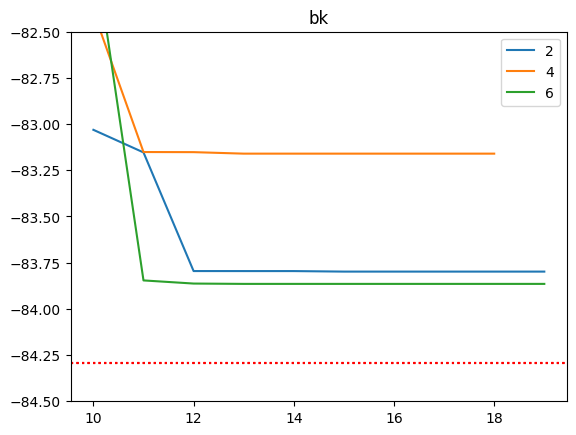

In [98]:
import matplotlib.pyplot as plt
for encoding in vals["2"]:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
        plt.axhline(y=-84.2948, color='r', linestyle=':')
        plt.ylim(-84.5,-82.5)
    plt.title(f"{encoding}".replace("flower","5nto"))
    plt.legend()
    plt.show()

# Double 2e Term

In [86]:
vals = {}
for val in range(2, 9, 2):
    print("Running %d", val)
    vals[str(val)]= run_max_bond(val, "sto-3g/doubled")

Running %d 2
Running %d 4
Running %d 6
Running %d 8


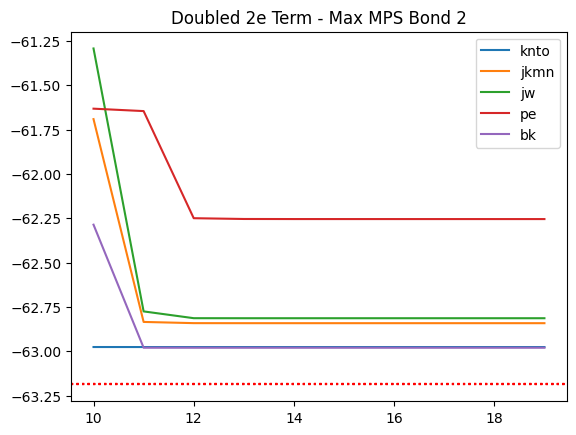

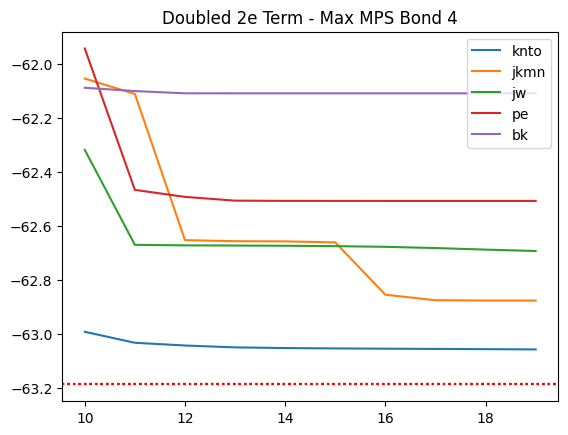

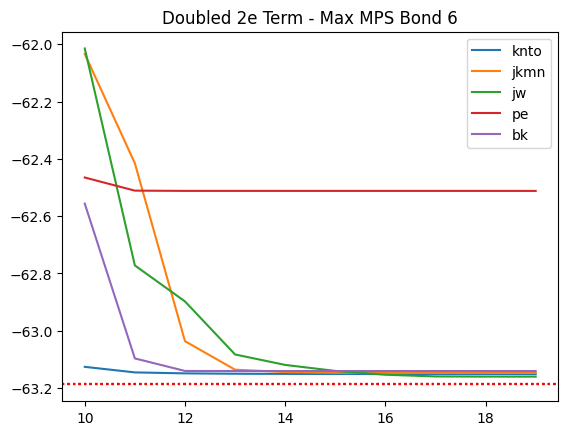

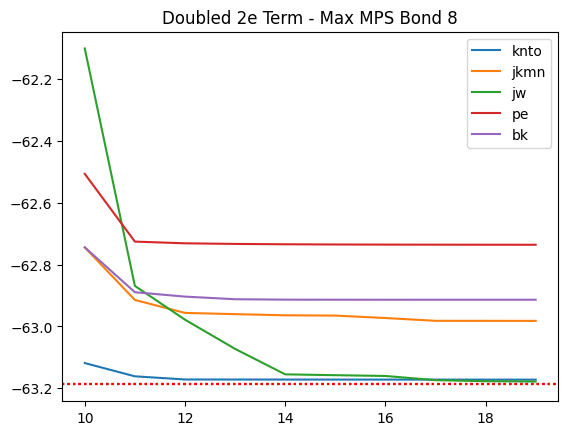

In [88]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:#['k-nto (7)', 'jw', 'pe', 'kb']:
        plt.plot(set[encoding], label=encoding.replace("flower","5nto"))
        plt.axhline(y=-63.18778168, color='r', linestyle=':')
    plt.title(f"Doubled 2e Term - Max MPS Bond {max_bond}")
    plt.legend()
    plt.show()

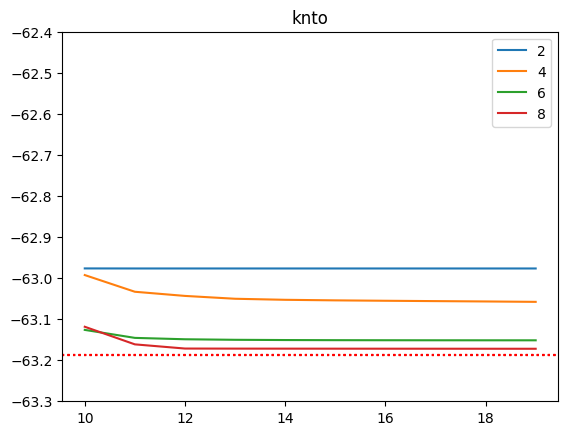

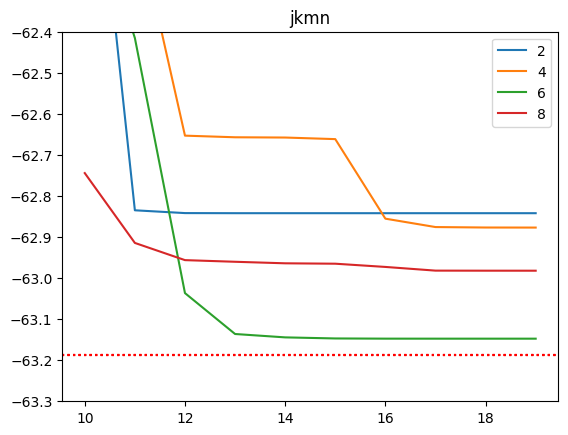

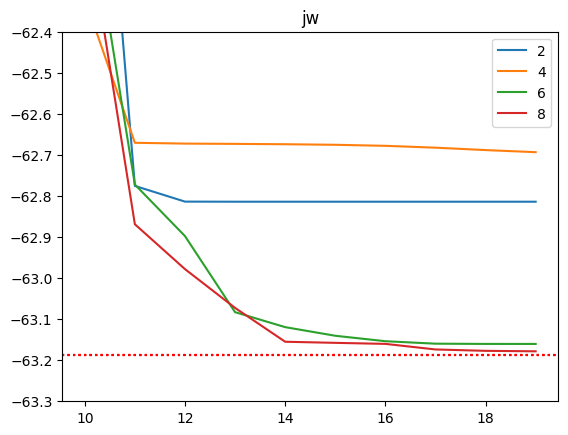

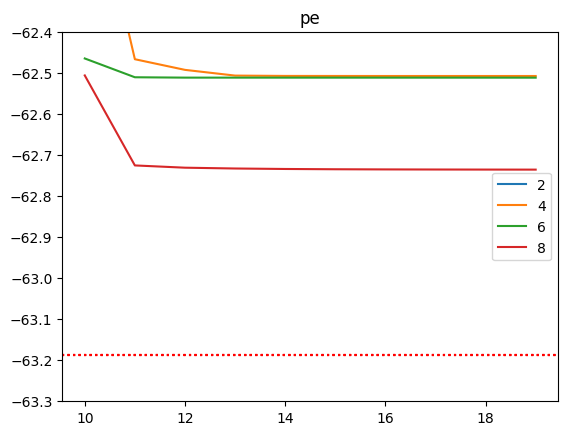

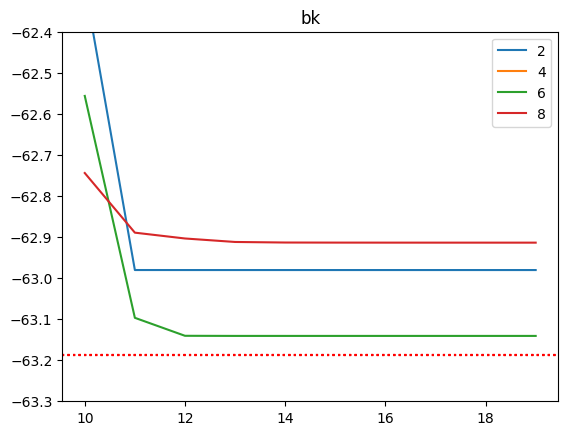

In [89]:
import matplotlib.pyplot as plt
for encoding in vals["2"]:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
        plt.axhline(y=-63.18778168, color='r', linestyle=':')
        plt.ylim(-63.3,-62.4)
    plt.title(f"{encoding}".replace("flower","5nto"))
    plt.legend()
    plt.show()

# Quadrupled 2e Terms

In [ ]:
vals = {}
for val in range(2, 7, 2):
    print("Running %d", val)
    vals[str(val)]= run_max_bond(val, "quad") 

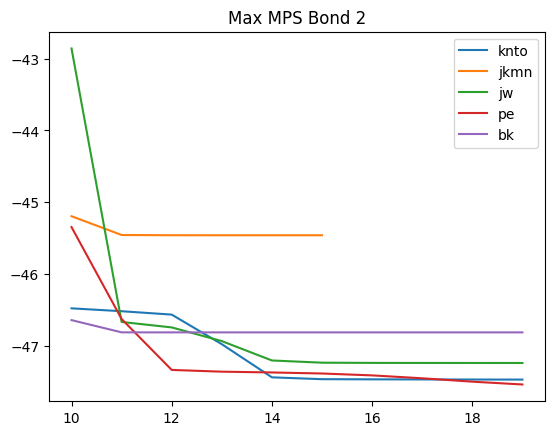

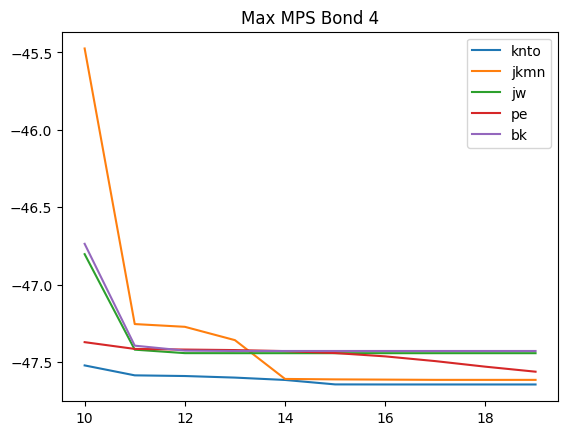

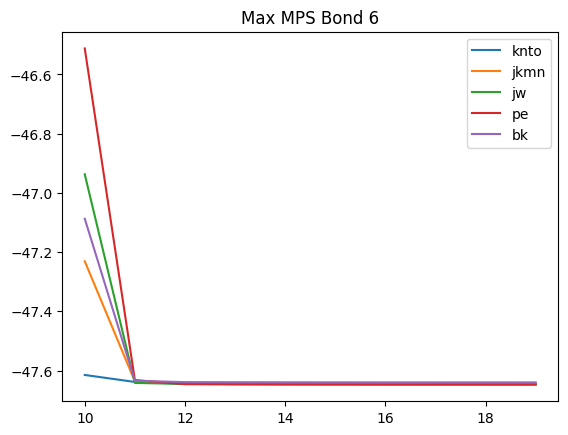

In [ ]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:#['k-nto (7)', 'jw', 'pe', 'kb']:
        plt.plot(set[encoding], label=encoding.replace("flower","5nto"))
        # plt.axhline(y=-84.2948, color='r', linestyle=':')
    plt.title(f"Max MPS Bond {max_bond}")
    plt.legend()
    plt.show()

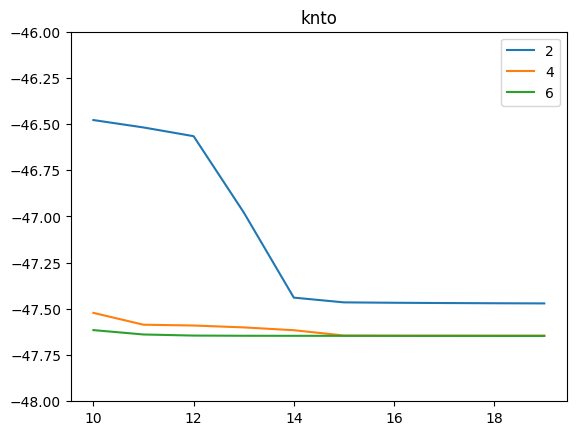

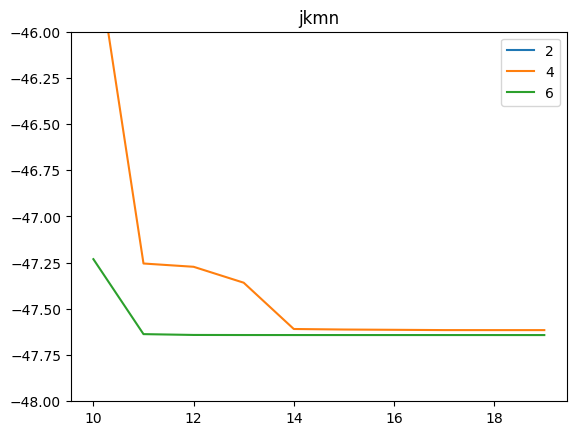

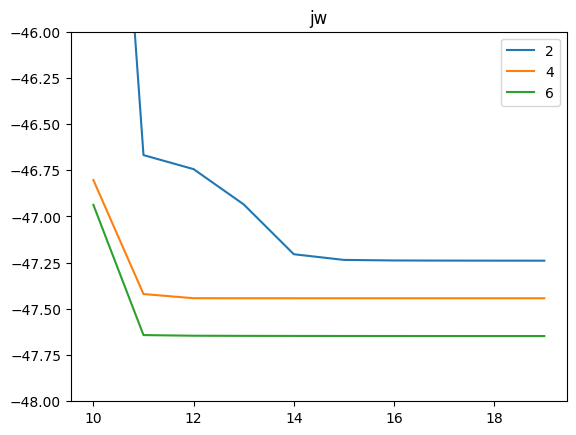

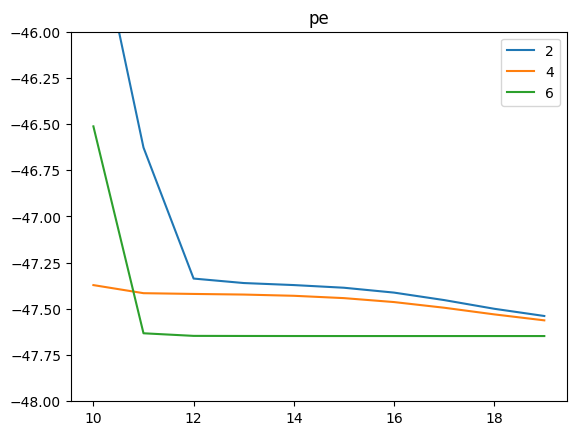

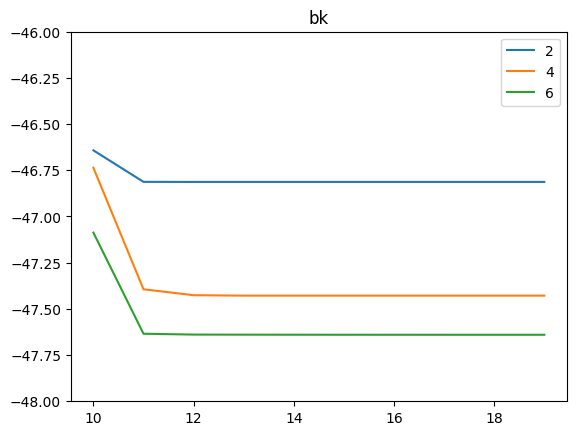

In [ ]:
import matplotlib.pyplot as plt
for encoding in vals["2"]:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
        plt.axhline(y=-84.2948, color='r', linestyle=':')
        plt.ylim(-48,-46)
    plt.title(f"{encoding}".replace("flower","5nto"))
    plt.legend()
    plt.show()

In [ ]:
vals = {}
for val in range(2, 5, 1):
    print("Running %s", val)
    vals[str(val)]= run_max_bond(max_bond=val, folder="ozone", max_runs=3)

Running %d 2
Running %d 3
Running %d 4


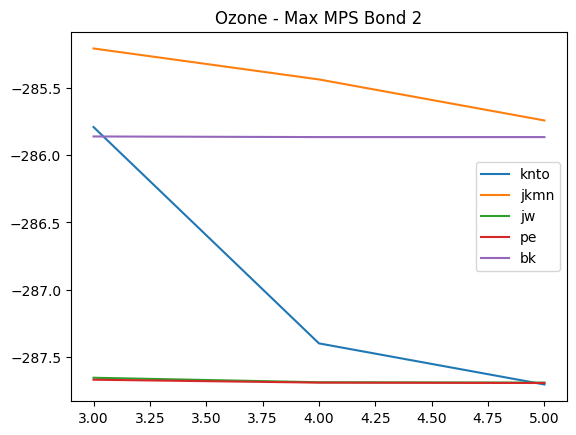

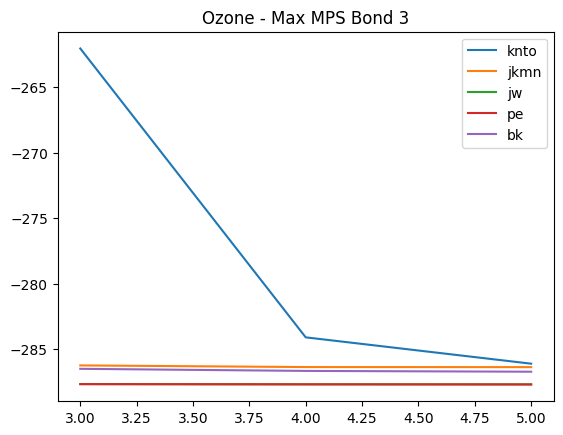

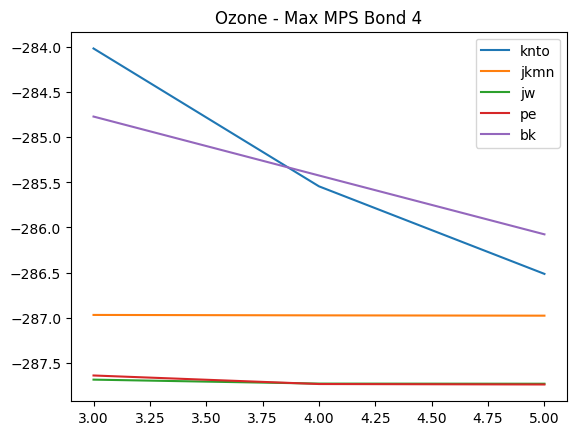

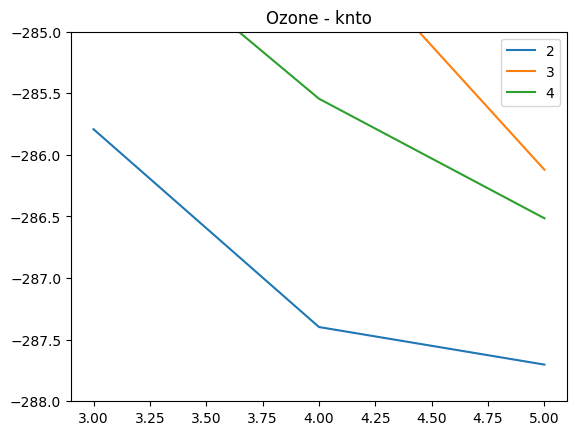

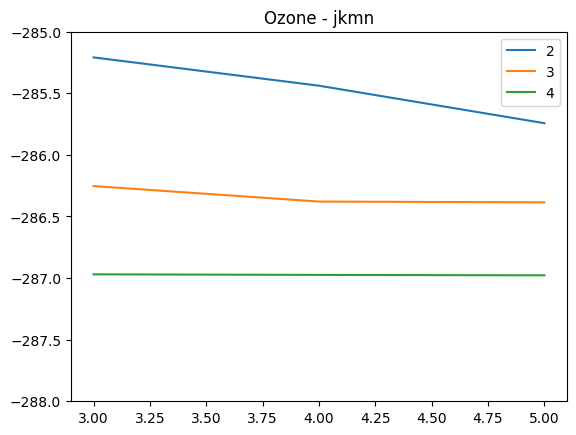

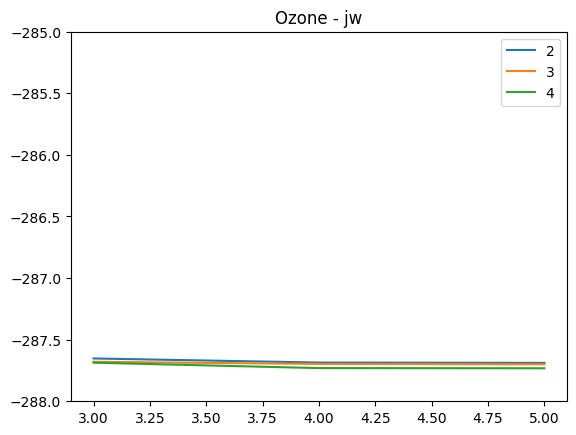

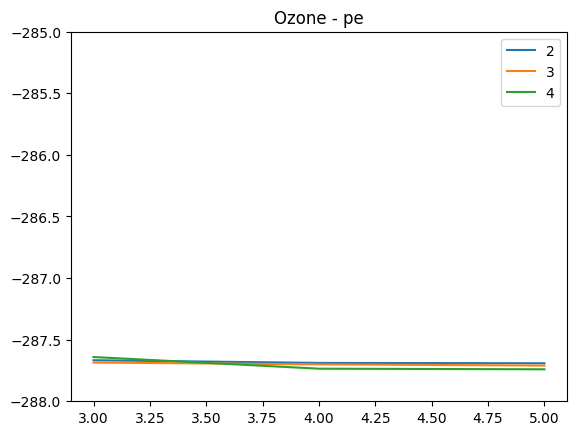

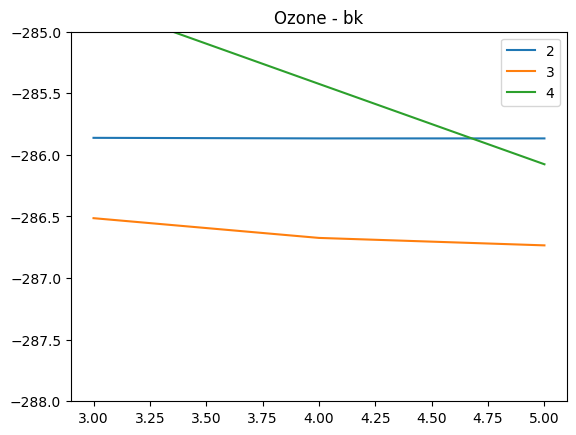

In [ ]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:#['k-nto (7)', 'jw', 'pe', 'kb']:
        plt.plot(set[encoding], label=encoding.replace("flower","5nto"))
        # plt.axhline(y=-221.27, color='r', linestyle=':')
    plt.title(f"Ozone - Max MPS Bond {max_bond}")
    plt.legend()
    plt.show()

import matplotlib.pyplot as plt
for encoding in vals["2"]:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
        # plt.axhline(y=-221.27, color='r', linestyle=':')
        plt.ylim(-288,-285)
    plt.title(f"Ozone - {encoding}".replace("flower","5nto"))
    plt.legend()
    plt.show()

In [71]:
def run_max_bond(max_bond, folder, max_runs = 10):
    outputs = {
        "knto":None, 
        "jw":None,
        #"pe":None,
        #"bk":None,
        #"jkmn":None,
        }
    for output in outputs:
        print(f"Running {output}-{max_bond}")
        try:
            outputs[output]= test_QubitDMRG(folder + f"/{output}.json", max_bond, max_runs)
        except:
            print(f"Error for {output}-{max_bond}!")
            continue
    return outputs

vals = {}
for val in range(2, 5):
    print("Running %d", val)
    vals[str(val)]= run_max_bond(val, "6-31G*/water")

Running %d 2
Running %d 3
Running %d 4
Error for knto-4!
Error for jw-4!


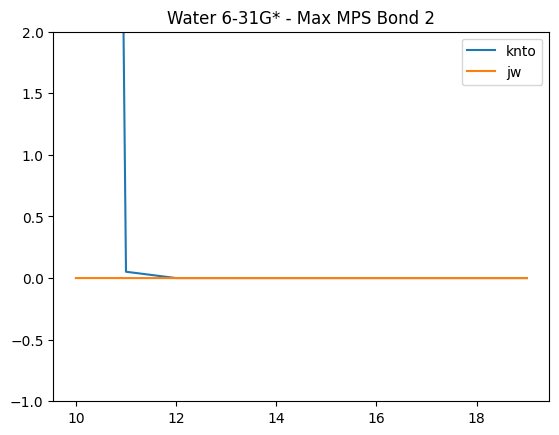

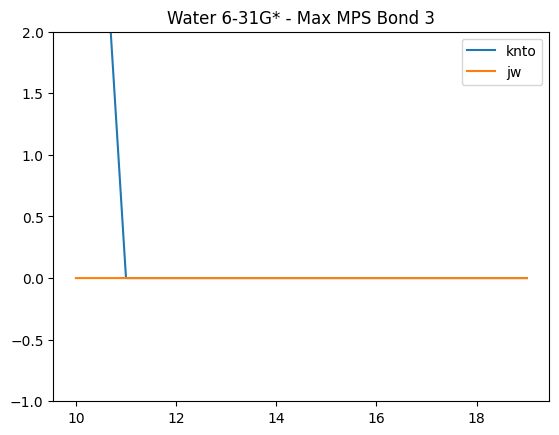

ValueError: x, y, and format string must not be None

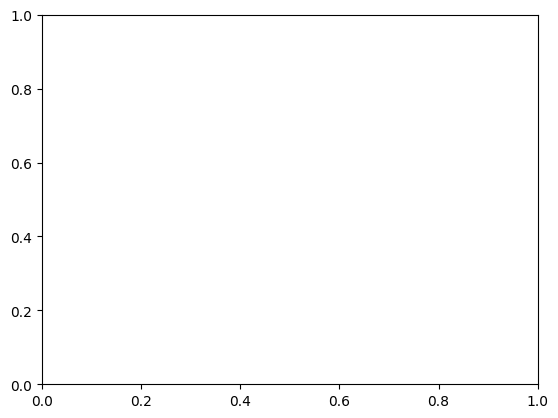

In [72]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:#['k-nto (7)', 'jw', 'pe', 'kb']:
        plt.plot(set[encoding], label=encoding.replace("flower","5nto"))
        # plt.axhline(y=-221.27, color='r', linestyle=':')
    plt.title(f"Water 6-31G* - Max MPS Bond {max_bond}")
    plt.ylim(-1,2)
    plt.legend()
    plt.show()

import matplotlib.pyplot as plt
for encoding in vals["2"]:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
        # plt.axhline(y=-221.27, color='r', linestyle=':')
        plt.ylim(-288,-285)
    plt.title(f"Water 6-31G* - {encoding}".replace("flower","5nto"))
    plt.legend()
    plt.show()